In [2]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import seaborn as sns

In [3]:
def sigmoid(c, Kd, A, B):
    return  np.log10(A *(10**c/(10**c+10**Kd)) + B)

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

def measure_Kds(mean_log_fluor, std_log_fluor, concs):
    popt, pcov = scipy.optimize.curve_fit(sigmoid,
                                          concs,
                                          mean_log_fluor,
                                          p0=[-9,10**4,10**1],
                                          sigma=std_log_fluor,
                                          absolute_sigma=True,
                                          bounds = [(-16,1,1),(-5,10**6,10**6)],
                                          maxfev=400000)

    return popt, pcov
    
def plot_fit(mean_log_fluor, std_log_fluor, concs, popt, pcov, ax):
    concs_plot = np.linspace(concs.min(), concs.max())
    ax.errorbar(concs, mean_log_fluor, yerr=std_log_fluor, fmt='o', capsize=3)
    ax.plot(concs_plot, sigmoid(concs_plot, *popt), color='grey')
    ax.axvline(popt[0], linestyle='-', color='red',
               label=r'$\log_{10} K_D = %.2f \pm %.2f$' % (popt[0], pcov[0][0]))
    ax.axvline(popt[0] + pcov[0][0], linestyle=':', color='red')
    ax.axvline(popt[0] - pcov[0][0], linestyle=':', color='red')
    ax.set_xlabel('log [ACE]')
    ax.set_ylabel('log PE fluorescence')
    ax.legend()
    
# Similar to plot-fit but everything is exponentiated
def plot_fit_exp(mean_log_fluor, std_log_fluor, concs, popt, pcov, ax):
    concs_plot = np.linspace(concs.min(), concs.max())
    ax.errorbar(concs, 10**mean_log_fluor, 
                yerr=np.stack((10**(mean_log_fluor - std_log_fluor), 10**(mean_log_fluor + std_log_fluor))),
                fmt='o', capsize=3)
    ax.plot(concs_plot, 10**sigmoid(concs_plot, *popt), color='grey')
    ax.axvline(popt[0], linestyle='-', color='red',
               label=r'$\log_{10} K_D = %.2f \pm %.2f$' % (popt[0], pcov[0][0]))
    ax.axvline(popt[0] + pcov[0][0], linestyle=':', color='red')
    ax.axvline(popt[0] - pcov[0][0], linestyle=':', color='red')
    ax.set_xlabel('log [ACE]')
    ax.set_ylabel('lPE fluorescence')
    ax.legend()

In [5]:
sample_list_ow

,Sample,log_concentration,Strain,Antibody,Control,is_bad,filename
0,A2,-7.0,102,555,0,1,../../Additional_data/Isogenic_measurement/202...
1,A3,-8.0,102,555,0,0,../../Additional_data/Isogenic_measurement/202...
2,A4,-9.0,102,555,0,0,../../Additional_data/Isogenic_measurement/202...
3,A5,-10.0,102,555,0,0,../../Additional_data/Isogenic_measurement/202...
4,A6,-11.0,102,555,0,0,../../Additional_data/Isogenic_measurement/202...
5,A7,-12.0,102,555,0,0,../../Additional_data/Isogenic_measurement/202...
6,B2,-7.0,102,16,0,1,../../Additional_data/Isogenic_measurement/202...
7,B3,-8.0,102,16,0,0,../../Additional_data/Isogenic_measurement/202...
8,B4,-9.0,102,16,0,0,../../Additional_data/Isogenic_measurement/202...
9,B5,-10.0,102,16,0,0,../../Additional_data/Isogenic_measurement/202...


In [ ]:
"../../Additional_data/Isogenic_measurement/20220210/ex"

In [52]:
directory = "../../Additional_data/Isogenic_measurement/220314_csv"
sample_list = pd.read_csv(f"{directory}/sample_info.csv")
sample_list["filename"] = sample_list.apply(lambda r: glob(
    f"../../Additional_data/Isogenic_measurement/220314_csv/{r['Well']}_Comp-FITC-A+_{r['Date']}-2022_*.csv")[0],
                                                  axis=1)
directory = f"../../Additional_data/Isogenic_measurement/20220210"
sample_list_ow = pd.read_csv(f"{directory}/samples_list.csv")
sample_list_ow["filename"] = sample_list_ow.Sample.apply(lambda x: glob(f"../../Additional_data/Isogenic_measurement/20220210/export_Specimen_???_{x}_???_*.csv")[0])
sample_list = pd.concat([sample_list, sample_list_ow])


def read_PEs(csv_file):
    df = pd.read_csv(csv_file)
    try:
        return df["Comp-PE-A"].to_list()
    except:
        return df["PE-A"].to_list()
        

def read_FITCs(csv_file):
    df = pd.read_csv(csv_file)
    try:
        return df["Comp-FITC-A"].to_list()
    except:
        return df["FITC-A"].to_list()

sample_list["PEs"] = sample_list.filename.apply(read_PEs)
sample_list["FITCs"] = sample_list.filename.apply(read_FITCs)
minFITCs = sample_list.FITCs.apply(np.min).min()
minPEs = sample_list.PEs.apply(np.min).min()
sample_list["logFITCs"] = sample_list.FITCs.apply(lambda x: [np.log10(u - minFITCs + 1) for u in x])
sample_list["logPEs"] = sample_list.PEs.apply(lambda x: [np.log10(u - minPEs + 1) for u in x])
sample_list["mean_log_PE"] = sample_list.logPEs.apply(np.mean)
sample_list["std_log_PE"] = sample_list.logPEs.apply(np.std)# / np.sqrt(df.PEs.apply(len))

sample_list["log_concentration"] = sample_list.log_concentration.apply(lambda x: -20.0 if x==0 else float(x))
sample_list["Strain"] = sample_list.Strain.apply(str)

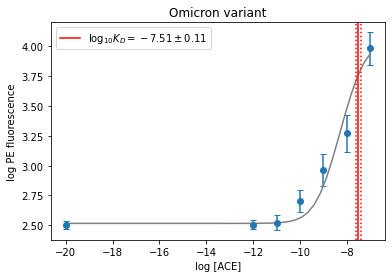

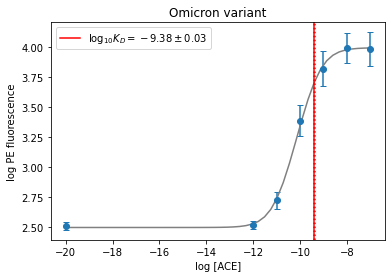

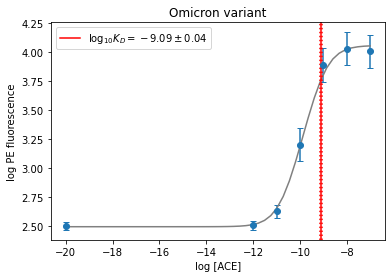

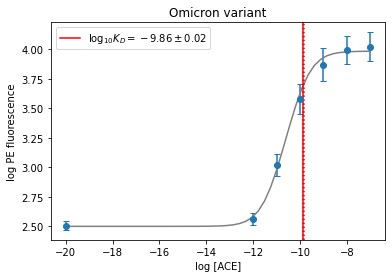

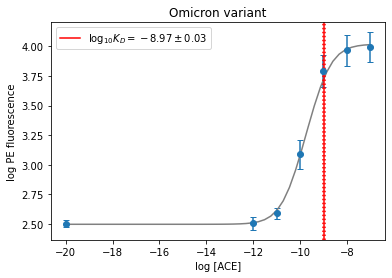

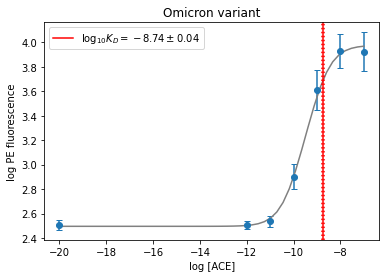

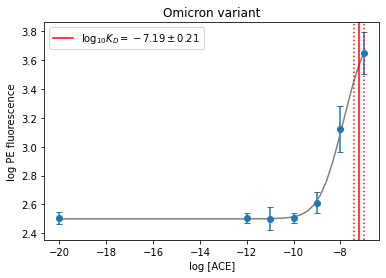

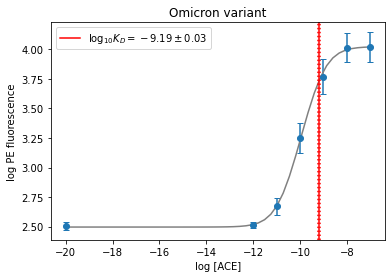

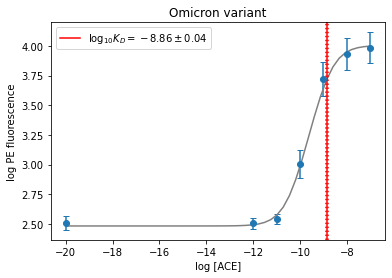

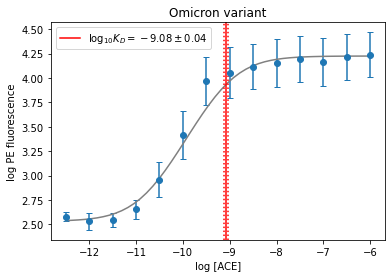

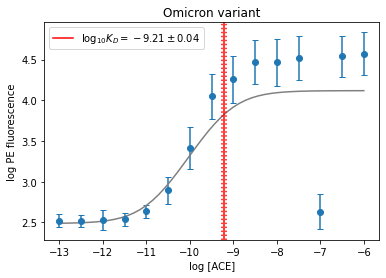

In [55]:
# mutant order 
dct_map = {
"101": "111111111111111",
"102": "000000000000000",
"s1": "000010000000000",
"s2": "000000010000000",
"s3": "000000001000000",
"s5": "000000000000100",
"s6": "000000000000010",
"s7": "000000000000110",
"s8": "000000000100100",
"s9": "000010000100110",
}

dfplot = pd.DataFrame()
dfplot["Strain"] = [f"s{ii}" for ii in range(1, 9)] + ["101", "102"]
dct, dct_err = {}, {}
for sp in sample_list.Strain.unique():
    df = sample_list[(sample_list.Strain == sp) & (sample_list.Control == 0) &
                     (~sample_list.Sample.isin(["H3", "G3"]))]
    popt, pcov = measure_Kds(df.mean_log_PE, df.std_log_PE, df.log_concentration)
    fig, ax = plt.subplots()
    plot_fit(df.mean_log_PE, df.std_log_PE, df.log_concentration, popt, pcov, ax)
    ax.set_title("Omicron variant")
    dct[sp] = popt[0]
    dct_err[sp] = pcov[0][0]
    
dfplot["Kd_isogenic"] = -dfplot.Strain.map(dct)
dfplot["Kd_isogenic_err"] = dfplot.Strain.map(dct_err)
    

In [54]:
dfplot

,Strain,Kd_isogenic_1,Kd_isogenic_1_err
0,s1,7.514659,0.110940
1,s2,9.087871,0.035376
2,s3,8.973856,0.032338
3,s4,7.191557,0.208604
4,s5,8.855690,0.038225
5,s6,9.383634,0.028525
6,s7,9.857989,0.024860
7,s8,8.743663,0.043750
8,101,9.079625,0.041396
9,102,9.211699,0.038131


In [56]:


df_read = pd.read_csv("../../Titeseq/results/Kds/cleaned_Kds_RBD_ACE2.tsv", dtype={"geno":"str"}, sep="\t")
dfplot["Kd_Titeseq"] = dfplot.Strain.map(dct_map).map(df_read.set_index("geno").log10Kd)
dfplot["Kd_Titeseq_err"] = dfplot.Strain.map(dct_map).map(df_read.set_index("geno").err_log10Kd)



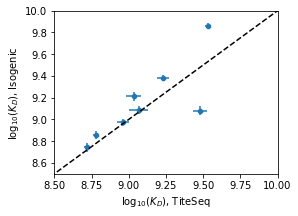

In [60]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(4, 3))
sns.scatterplot(x="Kd_Titeseq", y="Kd_isogenic", data=dfplot)
ax.errorbar(
             x=dfplot["Kd_Titeseq"], 
             y=dfplot["Kd_isogenic"], 
             xerr=dfplot["Kd_Titeseq_err"], 
             yerr=dfplot["Kd_isogenic_err"], ls='')
ax.plot([8, 10], [8, 10], "--", c="k")
ax.set_xlim((8.5, 10))
ax.set_ylim((8.5, 10))
plt.xlabel(r"$\log_{10}(K_D)$, TiteSeq")
plt.ylabel(r"$\log_{10}(K_D)$, Isogenic")


plt.savefig("../Figures/SI_QC_D.pdf")

In [59]:
dfplot

,Strain,Kd_isogenic,Kd_isogenic_err,Kd_Titeseq,Kd_Titeseq_err
0,s1,7.514659,0.110940,8.460035,0.029594
1,s2,9.087871,0.035376,9.066813,0.062743
2,s3,8.973856,0.032338,8.961147,0.040211
3,s4,7.191557,0.208604,NaN,NaN
4,s5,8.855690,0.038225,8.779812,0.020136
5,s6,9.383634,0.028525,9.231545,0.039869
6,s7,9.857989,0.024860,9.534639,0.018863
7,s8,8.743663,0.043750,8.719286,0.021062
8,101,9.079625,0.041396,9.478874,0.048803
9,102,9.211699,0.038131,9.033694,0.049984
